<a href="https://colab.research.google.com/github/shruti-singh/PaperAcceptancePrediction/blob/master/zeel/models/All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing & results----------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Models-------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
import sklearn.gaussian_process.kernels as kls
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# for visualizing ---------------
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO 
from IPython.display import Image, display
import seaborn as sns
# General purpose
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Load the data
# link to the data below - https://drive.google.com/open?id=1GAVoYBwtb4TK-XaCzgYvUePIvjf-acku
data_raw = pd.read_pickle('/content/drive/My Drive/SEM-1 ML Project/data/data_csv-2017.pkl')
data_raw.head(2)

,id,original,number,cdate,tcdate,tmdate,ddate,content,forum,referent,invitation,replyto,readers,nonreaders,signatures,writers,details,title,authors,abstract,keywords,replyCount,label,ref_latest,ref_len,ref_years
HJWHIKqgl,HJWHIKqgl,None,494,None,1478297149874,1559850667018,None,{'title': 'Generative Models and Model Critici...,HJWHIKqgl,None,ICLR.cc/2017/conference/-/submission,None,[everyone],[],[~Dougal_J_Sutherland1],[],{'replyCount': 12},Generative Models and Model Criticism via Opti...,"[Dougal J. Sutherland, Hsiao-Yu Tung, Heiko St...",We propose a method to optimize the representa...,[Unsupervised Learning],12,Accept,2019,34,"[2008, 2016, 2011, 2015, 2015, 2008, 2014, 200..."
SyK00v5xx,SyK00v5xx,None,448,None,1478291152993,1544202244497,None,{'title': 'A Simple but Tough-to-Beat Baseline...,SyK00v5xx,None,ICLR.cc/2017/conference/-/submission,None,[everyone],[],[~Yingyu_Liang1],[],{'replyCount': 19},A Simple but Tough-to-Beat Baseline for Senten...,"[Sanjeev Arora, Yingyu Liang, Tengyu Ma]",\nThe success of neural network methods for co...,"[Natural language processing, Unsupervised Lea...",19,Accept,2016,49,"[2012, 2012, 2013, 2013, 2014, 2015, 2016, 200..."


# Preprocessing

In [3]:
# Feature creation--------------------
data = pd.DataFrame()
data_raw = data_raw[data_raw['label']!='Invite']
data['id'] = data_raw['id']#.value_counts()
data['n_authors'] = data_raw['authors'].apply(len)#.value_counts()
data['len_char_title'] = data_raw['title'].apply(len)
data['len_word_title'] = data_raw['title'].apply(lambda x: len(re.split(':|\s',x)))
data['len_char_abstract'] = data_raw['abstract'].apply(len)
data['len_word_abstract'] = data_raw['abstract'].apply(lambda x: len(re.split(':|\s',x)))
data['replyCount'] = data_raw['replyCount']
data['n_keywords'] = data_raw['keywords'].apply(len)
data['ref_len'] = data_raw['ref_len']
data['ref_latest'] = data_raw['ref_latest']
data['label'] = data_raw['label']
data.head(2)
#data.to_pickle('/content/drive/My Drive/Colab Notebooks/ML Project/data/data-2017-20.pkl')

,id,n_authors,len_char_title,len_word_title,len_char_abstract,len_word_abstract,replyCount,n_keywords,ref_len,ref_latest,label
HJWHIKqgl,HJWHIKqgl,7,76,10,996,160,12,1,34,2019,Accept
SyK00v5xx,SyK00v5xx,3,59,8,1611,253,19,2,49,2016,Accept


In [0]:
# shuffle the data
data = data.sample(n=len(data), random_state=42)

In [0]:
# To plot the Decision Tree--------------------------------------------
def plot(clf):
  dot_data = StringIO()
  tree.export_graphviz(clf[0], 
  out_file=dot_data, 
  class_names=['Accept','Reject'], # the target names.
  feature_names=X.columns, # the feature names.
  filled=True, # Whether to fill in the boxes with colours.
  rounded=True, # Whether to round the corners of the boxes.
  special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return Image(graph.create_png())

# All models

In [0]:
clf_dict = {'DecisionTree':DecisionTreeClassifier(max_depth=2),
            'RandomForest':RandomForestClassifier(max_depth=10),
            'LogisticR':LogisticRegression(max_iter=5000),
            'LogisticLassoR':LogisticRegression(max_iter=5000, penalty='l1',solver='liblinear'),
            'RidgeClf':RidgeClassifier(max_iter=5000),
            'SVC':SVC(kernel='rbf'),
            'GaussNB':GaussianNB(),
            'NeuralNet':MLPClassifier((50),activation='logistic'),
            'KNN':KNeighborsClassifier(n_neighbors=10),
            'GaussianProcessClf':GaussianProcessClassifier(kernel=kls.RBF())
            }

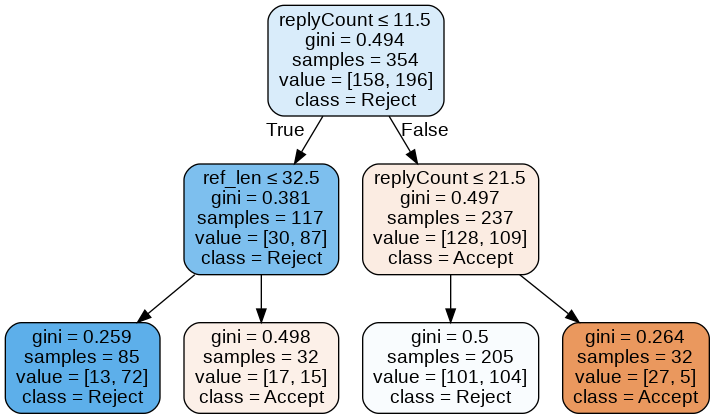

In [7]:
model_results = pd.DataFrame()
model_results['Accuracy'] = None
model_results['CVresults'] = None

for clf_name,clf in clf_dict.items():
  X = data.drop(columns=['id','label'])
  y = data['label']
  results = cross_validate(clf, X, y, return_estimator=True)
  clf = results['estimator']
  results.pop('estimator')
  accuracy = np.mean(results['test_score'])
  model_results.loc[clf_name, ['Accuracy', 'CVresults']] = [accuracy, results]
  if clf_name == 'DecisionTree':
    display(plot(clf))

In [8]:
model_results

,Accuracy,CVresults
DecisionTree,0.588994,"{'fit_time': [0.0033142566680908203, 0.0031423..."
RandomForest,0.650026,"{'fit_time': [0.18831253051757812, 0.182115316..."
LogisticR,0.661364,"{'fit_time': [0.03532767295837402, 0.040500164..."
LogisticLassoR,0.665858,"{'fit_time': [0.017682313919067383, 0.01776719..."
RidgeClf,0.672549,"{'fit_time': [0.004786252975463867, 0.00382566..."
SVC,0.553064,"{'fit_time': [0.008081912994384766, 0.00800895..."
GaussNB,0.641088,"{'fit_time': [0.0024154186248779297, 0.0022084..."
NeuralNet,0.589147,"{'fit_time': [0.3985164165496826, 0.3959436416..."
KNN,0.555414,"{'fit_time': [0.00415349006652832, 0.003301382..."
GaussianProcessClf,0.562028,"{'fit_time': [0.06987190246582031, 0.078152656..."


In [9]:
# Copy the results into .md file to visualize the table in .md
model_results.drop(columns=['CVresults']).to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Accuracy</th>    </tr>  </thead>  <tbody>    <tr>      <th>DecisionTree</th>      <td>0.588994</td>    </tr>    <tr>      <th>RandomForest</th>      <td>0.650026</td>    </tr>    <tr>      <th>LogisticR</th>      <td>0.661364</td>    </tr>    <tr>      <th>LogisticLassoR</th>      <td>0.665858</td>    </tr>    <tr>      <th>RidgeClf</th>      <td>0.672549</td>    </tr>    <tr>      <th>SVC</th>      <td>0.553064</td>    </tr>    <tr>      <th>GaussNB</th>      <td>0.641088</td>    </tr>    <tr>      <th>NeuralNet</th>      <td>0.589147</td>    </tr>    <tr>      <th>KNN</th>      <td>0.555414</td>    </tr>    <tr>      <th>GaussianProcessClf</th>      <td>0.562028</td>    </tr>  </tbody></table>'